In [10]:
import json
import requests #Hacer peticiones a APIS
from shapely.geometry  import shape, mapping


In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
with open ('/content/drive/MyDrive/boundingbox.geojson', 'r', encoding='utf-8') as archivo:
  miJSON = json.load(archivo)

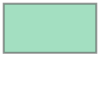

In [13]:
miGeometria = miJSON['features'][0]['geometry']
miPoligono = shape(miGeometria) #Convertir info del geojson en una geometria
miPoligono

In [14]:
xmin, ymin, xmax, ymax = miPoligono.bounds

In [15]:
#Contruir consulta para conectar a la API
url = "https://services2.arcgis.com/NEwhEo9GGSHXcRXV/arcgis/rest/services/HistoricoSiniestros/FeatureServer/0/query"
parametros = {
    "f":"json",
    "geometry":f"{xmin}, {ymin}, {xmax}, {ymax}",
    "geometryType":"esriGeometryEnvelope",
    "spatialRel": "esriSpatialRelIntersects",
    "where":"1=1",
    "outFields":"*"
}

In [16]:
respuesta = requests.get(url, parametros)

In [17]:
if respuesta.status_code==200:          #Codigo 200 es que todo salió perfecto
  with open ('arboles.geojson', 'w', encoding='utf-8') as archivo:
    archivo.write(respuesta.text)
else:
  print ("Todo se derrumbó")

In [18]:
import geopandas as gpd

geo1 = gpd.read_file("/content/drive/MyDrive/historico_siniestros_bogota_d.c.geojson")
geo2 = gpd.read_file("/content/drive/MyDrive/kennedy.geojson")

geo2=geo2.to_crs(geo1.crs)

arboles = geo1[geo1.intersects(geo2.union_all())]
arboles.to_file("siniestros_kennedy.geojson", driver="GeoJSON")